In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# 그래프에 한글 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 박스플롯
- 데이터로부터 얻어진 아래의 다섯 가지 요약 수치를 사용해서 그려진다.<br>
    최소값<br>
    제 1사분위 수 (Q1) : 전체 데이터 중 하위 25%에 해당하는 값<br>
    제 2사분위 수 또는 중위수 (Q2)<br>
    제 3사분위 수 (Q3) : 전체 데이터 중 상위 25%에 해당하는 값<br>
    최대값
    <br>

- 다른 값들과 동떨어진 값을 이상치로 표현한다.<br>
    어떤 값이 (1/4 지점의 값 - 1.5*사분위수 범위) 보다 작거나,<br>
    어떤 값이 (3/4 지점의 값 + 1.5*사분위수 범위) 보다 크면 그 값을 이상치로 정한다.
- 사분위수 범위 = 3/4지점의 값 - 1/4지점의 값

## 샘플 데이터
- 125명의 점수 데이터

In [11]:
scores = pd.Series([0,10,15,15,15,16,19,20,21,25,25,26,26,29,30,35,36,37,40,41,41,44,45,45,45,
            50,50,50,50,51,51,51,55,55,56,60,61,62,62,63,64,65,65,65,65,66,66,66,66,66,66,
            67,68,68,69,69,70,70,70,70,70,70,70,70,71,71,71,71,71,72,72,72,73,73,74,74,74,75,75,75,
            76,76,76,76,76,77,77,77,77,77,78,78,78,78,78,79,79,79,79,80,80,80,80,80,81,81,81,82,82,
            85,85,85,88,88,89,90,90,90,93,83,95,95,95,97,100])

### 샘플데이터의 통계값
시리즈.describe()

In [14]:
scores.describe()

count    125.000000
mean      64.312000
std       21.469564
min        0.000000
25%       51.000000
50%       70.000000
75%       78.000000
max      100.000000
dtype: float64

### 이상치 구하기
- 1/4 지점의 값: 시리즈.quantile(.25)
- 3/4 지점의 값: 시리즈.quantile(.75)
- 이상치<br>
    1/4 지점의 값 - 1.5*사분위수 범위<br>
    3/4 지점의 값 + 1.5*사분위수 범위

In [18]:
Q1 = scores.quantile(0.25)
print('1/4 지점의 값 : ', Q1)

Q3 = scores.quantile(0.75)
print('3/4 지점의 값 : ', Q3)

# 이상치
print('이상치:', Q1 - 1.5*(Q3-Q1), '미만')
print('이상치:', Q3 + 1.5*(Q3-Q1), '이상')

1/4 지점의 값 :  51.0
3/4 지점의 값 :  78.0
이상치: 10.5 미만
이상치: 118.5 이상


## 박스플롯
**`plt.boxplot(data)`**

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdecafbeeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdecab7ebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdecb4f80a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdec8493250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdecab81be0>],
 'means': []}

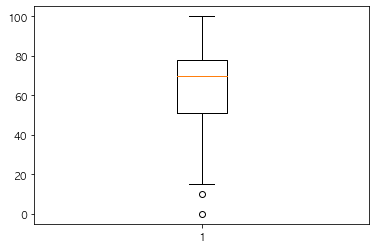

In [19]:
plt.boxplot(scores)

## 평균 표시하기
- showmeans = True
- meanline = True

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdecadcd970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdecade8070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdecadcd610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdecade8730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdecade8df0>],
 'means': [<matplotlib.lines.Line2D at 0x7fdecade8a90>]}

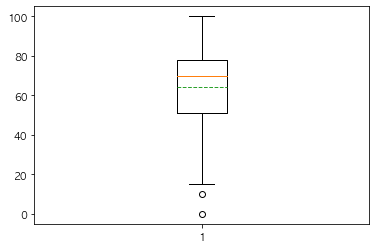

In [23]:
plt.boxplot(scores, showmeans=True, meanline=True)

## 수평 박스플롯
- vert=False

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdecaf05370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdecaf05a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdecaeebfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdecafe1130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdecafe17f0>],
 'means': [<matplotlib.lines.Line2D at 0x7fdecafe1490>]}

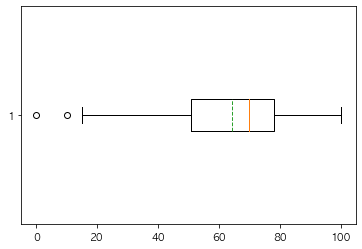

In [24]:
plt.boxplot(scores, showmeans=True, meanline=True, vert=False)

# 여러 개의 데이터 비교하기
## 샘플 데이터
- 붓꽃 데이터

In [25]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 여러 개의 데이터 비교하기
- plt.boxplot(데이터리스트, labels=레이블리스트)

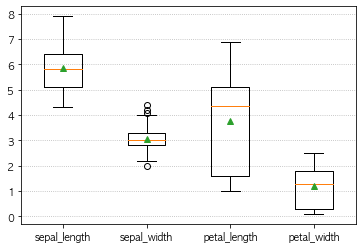

In [35]:
plt.boxplot([iris['sepal_length'], iris['sepal_width'],iris['petal_length'], iris['petal_width']],
            labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
            showmeans=True)
plt.grid(axis='y', ls=":")
plt.show()